[  0 255]


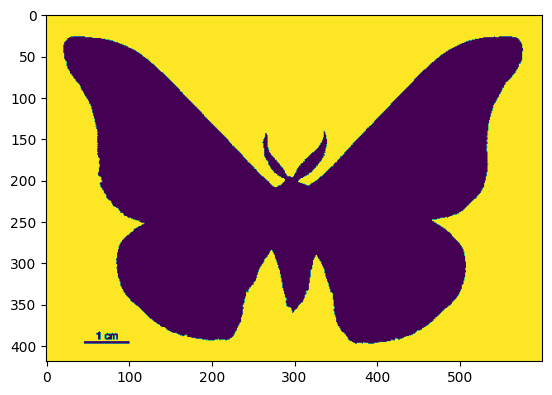

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from shapely import Polygon
from shapely import affinity

moth = cv2.imread("moth.jpg", cv2.IMREAD_GRAYSCALE)
(_, moth_bw) = cv2.threshold(moth, 240, 255, cv2.THRESH_BINARY)
print(np.unique(moth_bw))
plt.imshow(moth_bw)
plt.show()

In [2]:
contours,_ = cv2.findContours(moth_bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))


6


(419, 600)


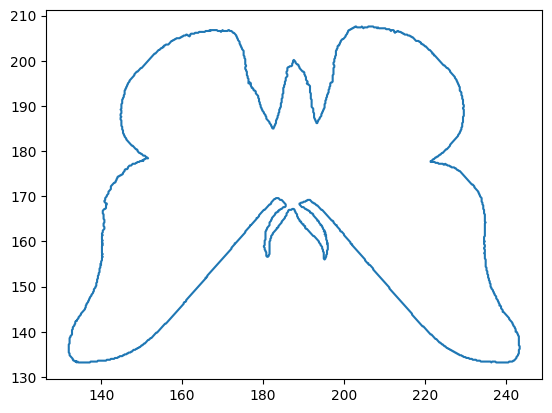

In [16]:
print(moth_bw.shape)
# print(np.squeeze(contours[0]))
moth_poly =  Polygon(np.squeeze(contours[4]))
# plt.plot(*moth_poly.exterior.xy)
moth_poly = affinity.translate(
    affinity.scale(moth_poly, xfact=0.2,yfact=0.2, origin=(0,0)),
    xoff=128, yoff=128
)

plt.plot(*moth_poly.exterior.xy)

In [17]:
from shapely import to_geojson
import json

with open("moth_data.json", "w") as moth_file:
    json.dump(json.loads(to_geojson(moth_poly)), moth_file)

{'type': 'Polygon', 'coordinates': [[[7.25, 6.75], [7.5, 6.5], [7.75, 6.75], [8.0, 6.5], [8.25, 6.5], [8.5, 6.5], [8.75, 6.5], [9.0, 6.5], [9.25, 6.5], [9.5, 6.5], [9.75, 6.5], [10.0, 6.5], [10.25, 6.5], [10.5, 6.5], [10.75, 6.5], [11.0, 6.5], [11.25, 6.5], [11.5, 6.5], [11.75, 6.75], [12.0, 6.75], [12.25, 6.75], [12.5, 6.75], [12.75, 6.75], [13.0, 6.75], [13.25, 6.75], [13.5, 6.75], [13.75, 6.75], [14.0, 7.0], [14.25, 7.0], [14.5, 7.0], [14.75, 7.0], [15.0, 7.0], [15.25, 7.0], [15.5, 7.0], [15.75, 7.0], [16.0, 7.0], [16.25, 7.0], [16.5, 7.0], [16.75, 7.25], [17.0, 7.25], [17.25, 7.25], [17.5, 7.25], [17.75, 7.25], [18.0, 7.5], [18.25, 7.5], [18.5, 7.5], [18.75, 7.5], [19.0, 7.5], [19.25, 7.75], [19.5, 7.75], [19.75, 7.75], [20.0, 7.75], [20.25, 8.0], [20.5, 8.0], [20.75, 8.25], [21.0, 8.25], [21.25, 8.25], [21.5, 8.25], [21.75, 8.5], [22.0, 8.5], [22.25, 8.75], [22.5, 8.75], [22.75, 8.75], [23.0, 9.0], [23.25, 9.0], [23.5, 9.25], [23.75, 9.25], [24.0, 9.25], [24.25, 9.5], [24.5, 9.5],

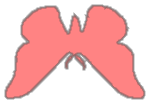

In [12]:
with open("moth_data.json", "r") as moth_data_file:
    moth_data = json.load(moth_data_file)
    print(moth_data)
Polygon(tuple(map(lambda coordinate: (int(coordinate[0]), int(coordinate[1])), moth_data.get("coordinates")[0])))